**Before Starting**: First, fill out the below code cell with your first name, last name, and student ID.

**Before Submission**: Make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).


**During Lab Tips**:
1. DO NOT write your written responses in the same markdown cell as the question. If you do this, your written response will be lost!


2. DO NOT use outside datasets. Use ONLY the datasets linked in this lab. While outside datasets might work locally for YOU, code is likely to fail when being graded as outside datasets can be formatted differently.


3. If possible, please try to use your local Jupyter Notebook to complete the lab. Online notebook editors like Collab can edit notebook source code and cause our auto-grader to break, making grading your lab more difficult for us!

**<font color='red'>WARNING: Some TODOs have `todo_check()` functions which will give you a rough estimate of whether you will recieve points or not. <u>These checks are there simply to make sure you are on the right track and they DO NOT determine your final grade for the lab</u>. They are only here to provide you with real-time feedback.</font>**

In [1]:
FIRST_NAME = "Claude"
LAST_NAME = "Kouakou"
STUDENT_ID = "801438848"

##### 
# Model Evaluation and Improvement


In [3]:
# Extra imports for this lab that are beyond the scope of discussion
import os
import gc
import traceback
import warnings
from pdb import set_trace

# Set this to True if you DO NOT want to run the 
# garbage_collect() functions throughout the notebook
turn_off_garbage_collect = False

# Default seed to be used for lab
seed = 0

def garbage_collect(vars_):
    if not turn_off_garbage_collect:
        for v in vars_:
            if v in globals():
                del globals()[v]
        collected = gc.collect()

        
class TodoCheckFailed(Exception):
    pass

def todo_check(asserts):
    failed_err = "You passed {}/{} and FAILED the following code checks:\n{}"
    failed = ""
    n_failed = 0
    for check, (condi, err) in enumerate(asserts):
        exc_failed = False
        if isinstance(condi, str):
            try:
                passed = eval(condi)
            except Exception:
                exc_failed = True
                n_failed += 1
                failed += f"\nCheck [{check+1}]: Failed to execute check [{check+1}] due to the following error...\n{traceback.format_exc()}"
        elif isinstance(condi, bool):
            passed = condi
        else:
            raise ValueError("asserts must be a list of strings or bools")

        if not exc_failed and not passed:
            n_failed += 1
            failed += f"\nCheck [{check+1}]: Failed\n\tTip: {err}\n"

    if len(failed) != 0:
        passed = len(asserts) - n_failed
        err = failed_err.format(passed, len(asserts), failed)
        raise TodoCheckFailed(err.format(failed))
    print("Your code PASSED the code check!")

# Goal

The goal of this activity is to evaluate the machine learning models and practice methods to improve the performance of them. We will use the [Wine Quality Dataset](https://archive.ics.uci.edu/dataset/186/wine+quality) and [Energy Efficiency dataset](https://archive.ics.uci.edu/dataset/242/energy+efficiency). Follow the TODO titles and comments to finish the activity!

# Agenda

* Data Preparation
* Data Visualization 
* Classification Evaluation
* Regression Evaluation
* Cross Validation
* Hyper-Parameter Search
* Feature Selection

# Tables of TODO's


1. [TODO1 (2 points)](#TODO1) 
2. [TODO2 (5 points)](#TODO2) 
3. [TODO3 (3 points)](#TODO3) 
4. [TODO4 (5 points)](#TODO4)  
5. [TODO5 (10 points)](#TODO5) 
6. [TODO6 (2 points)](#TODO6) 
7. [TODO7 (3 points)](#TODO7) 
8. [TODO8 (2 points)](#TODO8) 
9. [TODO9 (10 points)](#TODO9) 
10. [TODO10 (5 points)](#TODO10) 
12. [TODO11 (10 points)](#TODO11) 
13. [TODO12 (10 points)](#TODO12) 
13. [TODO13 (6 points)](#TODO13) 
13. [TODO14 (5 points)](#TODO14) 
13. [TODO15 (10 points)](#TODO15) 
13. [TODO16 (5 points)](#TODO16) 
13. [TODO17 (5 points)](#TODO17) 
18. [Feedback (2 points)](#feedback) 

Well, let us start the lab with importing the common libraries first. 

In [4]:
import random
from copy import deepcopy as copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

import seaborn as sns

# Datasets 

Let us prepare two datasets from [UCI Data Repository](https://archive.ics.uci.edu/ml/index.html), one for classification and the other for regression.  For classification, we will use [Wine Quality Dataset](https://archive.ics.uci.edu/dataset/186/wine+quality). We use [Energy Efficiency Dataset](https://archive.ics.uci.edu/dataset/242/energy+efficiency) for regression.

### Wine Quality Dataset 

The Wine Quality dataset is a popular benchmark dataset in machine learning and statistics, containing physicochemical properties of red and white variants of the Portuguese "Vinho Verde" wine. It comprises 11 input variables, including attributes like acidity, residual sugar, and alcohol content, along with quality ratings assigned by human experts. These quality ratings range from 0 to 10, reflecting the perceived quality of the wine. Researchers often use this dataset to explore predictive modeling tasks, such as regression to predict wine quality based on its chemical properties or classification to distinguish between high and low-quality wines. Its availability in public repositories like the UCI Machine Learning Repository makes it widely accessible for educational and research purposes in data analysis and machine learning.

You can directly download the file from [here](https://archive.ics.uci.edu/dataset/186/wine+quality).

**Note**: You have to combine both red and white wine quality CSV files for this lab. To avoid any sort of confusion in this, we suggest you to import the dataset directly from `ucimlrepo` library available in Python. Detailed instructions and the necessary code for this process can be seen by clicking the option 'Import in Python' present on the right side in the dataset link given above. You don't need to print the metadata and variable information in this notebook.

### Energy Efficiency Dataset

The Energy Efficiency dataset, donated in 2012, serves as a pivotal resource in the realm of building energy analysis, particularly focused on assessing heating and cooling load requirements as indicators of energy efficiency. Comprising 768 samples and 8 features, this dataset explores various building parameters, including relative compactness, surface area, wall area, roof area, overall height, orientation, glazing area, and glazing area distribution. Through simulations conducted with 12 different building shapes in Ecotect, the dataset captures a diverse range of building characteristics, allowing for in-depth analysis of their impact on energy performance. Researchers and practitioners leverage this dataset for classification and regression tasks, aiming to predict the heating and cooling loads of buildings based on their structural attributes. Published in the journal Energy and Buildings, this dataset facilitates advancements in statistical machine learning techniques for accurate estimation and optimization of residential building energy performance.

You can directly download the file from [here](https://archive.ics.uci.edu/dataset/242/energy+efficiency).

Now, let us load the two datasets into memory. 

<div id="TODO1"></div>

### TODO1 (2 points)
1. Using Pandas DataFrame, read the two csv files and store them to `df_wine` and `df_energy` respectively.  
    * Concatenate both the features and target dataframes in case you are importing the dataset from `ucimlrepo` package.
2. Print the summary using `describe`. 

In [7]:
# TODO 1.1: Wine Quality Dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
# data (as pandas dataframes) 
WX = wine_quality.data.features 
wt = wine_quality.data.targets 
df_wine = pd.concat([WX, wt], axis = 1)
df_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [8]:
# TODO 1.2 - Wine Quality Dataset
df_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
todo_check([
    ("df_wine.shape == (6497,12)", "df_wine has wrong shape."),
    ("df_wine.describe().shape == (8,12)", "df_wine.describe() has the wrong shape.")
])

Your code PASSED the code check!


In [10]:
# TODO 1.1 - Energy Efficiency Dataset
# fetch dataset 
energy_efficiency = fetch_ucirepo(id=242) 
  
# data (as pandas dataframes) 
EX = energy_efficiency.data.features 
et = energy_efficiency.data.targets 
df_energy = pd.concat([EX, et], axis = 1)

df_energy

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [11]:
# TODO 1.2 - Energy Efficiency Dataset
df_energy.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [12]:
todo_check([
    ("df_energy.shape == (768,10)", "df_energy has wrong shape."),
    ("df_energy.describe().shape == (8,10)", "df_energy.describe() has the wrong shape.")
])

Your code PASSED the code check!


<div id="TODO2"></div>

### TODO2 (5 points)

1. Now it's time to properly clean the datasets. Check each dataset and see if the data has any NaN values that need to be cleaned. If so, remove the NaN values by dropping them. 
    1. Hint: You can refer Data Preprocessing lab if you needed.  
    1. Hint: Check for NaNs in both the rows and columns! Remember we can do so using various Pandas methods.

In [25]:
# TODO 2 - Wine Quality Dataset
rows_with_null = df_wine[df_wine.isnull().any(axis=1)]
rows_with_null


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality


In [26]:
# TODO 2 - Energy Efficiency Dataset
rows_with_null = df_energy[df_energy.isnull().any(axis=1)]
rows_with_null


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2


In [27]:
todo_check([
    ("df_wine.shape == (6497,12)", "df_wine has wrong shape."),
    ("df_energy.shape == (768,10)", "df_energy has wrong shape.")
])

Your code PASSED the code check!


<div id="TODO3"></div>


Last week, we learned the skewness of data. Let us see if the data samples are skewed or not.

### TODO3 (3 points)

1. Compute the skewness for each feature in the wine DataFrame. Store the output into `wine_skew`.


2. Compute the skewness for each feature in the energy DataFrame. Store the output into `energy_skew`.


3. Which dataset (Wine Quality or Energy Efficiency) has more features that are positively skewed? 

In [28]:
# TODO 3.1
wine_skew = df_wine.skew()

wine_skew

fixed_acidity           1.723290
volatile_acidity        1.495097
citric_acid             0.471731
residual_sugar          1.435404
chlorides               5.399828
free_sulfur_dioxide     1.220066
total_sulfur_dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
quality                 0.189623
dtype: float64

In [29]:
# TODO 3.2
energy_skew = df_energy.skew()

energy_skew

X1    0.495513
X2   -0.125131
X3    0.533417
X4   -0.162764
X5    0.000000
X6    0.000000
X7   -0.060254
X8   -0.088689
Y1    0.360449
Y2    0.395992
dtype: float64

In [30]:
todo_check([
    ("np.all(np.isclose(wine_skew.iloc[[0, -2, -1]].values.flatten(),np.array([1.72328965, 0.56571773, 0.18962269]),rtol=.1))", "wine_skew values are potentially incorrect"),
    ("np.all(np.isclose(energy_skew.iloc[[0, -2, -1]].values.flatten(),np.array([0.49551251, 0.36044889, 0.39599247]),rtol=.1))", "energy_skew values are potentially incorrect"),
])

Your code PASSED the code check!


`TODO 3.3` Which dataset (Wine Quality or Energy Efficiency) has more features that are positively skewed? 

`ANSWER: the Wine Quality dataset has more features that are positively skewed`

In [34]:
garbage_collect(['wine_skew', 'energy_skew', 'X', 'y'])

## Visualization
Now it's time to do some quick visualization to see how the data look like.


<div id="TODO4"></div>

### TODO4 (5 points)

<font color="red"><b>WARNING: THIS CODE CAN TAKE A LONG TIME TO RUN! </b></font>   
As it compares the all the pairs, it may take long depending on your computing power. Once you get the figure, running this cell multiple times is not a good idea.    

1. Using `df_wine` and  Seaborn's pairplot function, create a scatter plot  for plotting all the features against each other. 


2. Using `df_energy` and  Seaborn's pairplot function, create a scatter plot  for plotting all the features against each other. 

Plot `TODO 4.1` below.

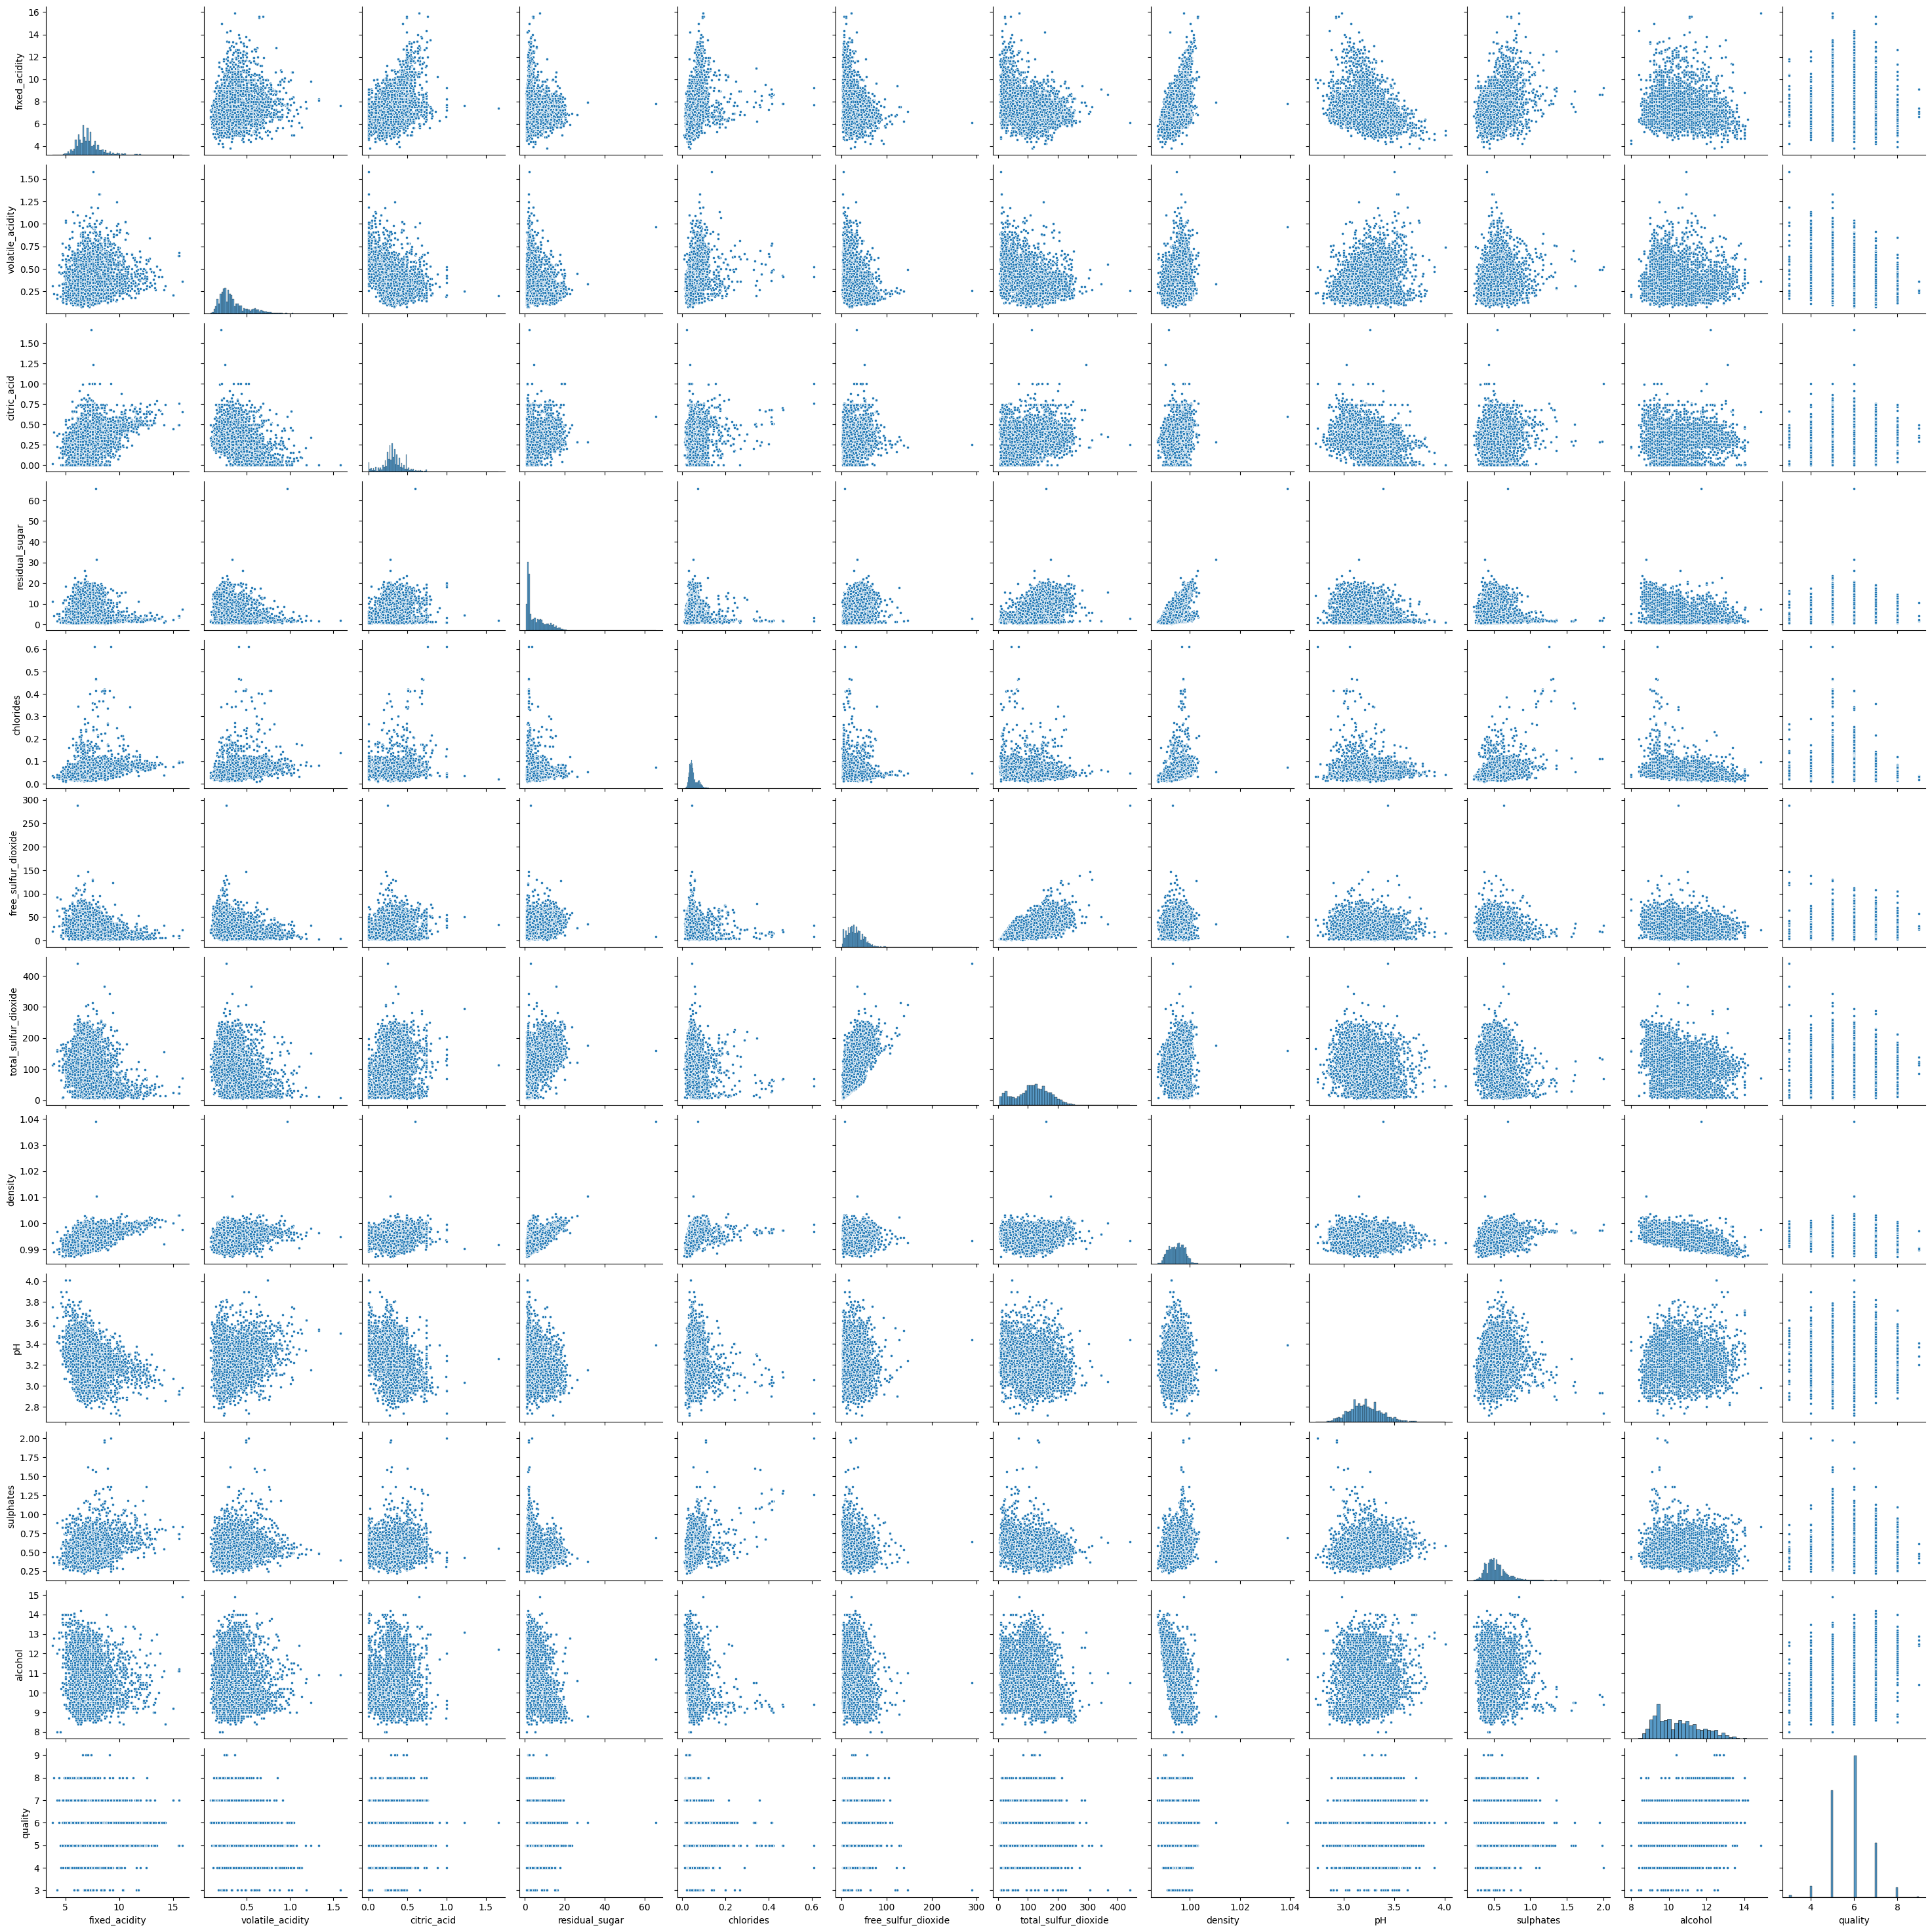

In [33]:
# TODO 4.1
import seaborn as sns

# Create a pairplot with kernel density estimates on the diagonal
sns.pairplot(df_wine, markers = '.', diag_kind='hist')
plt.show()


Plot `TODO 4.2` below.

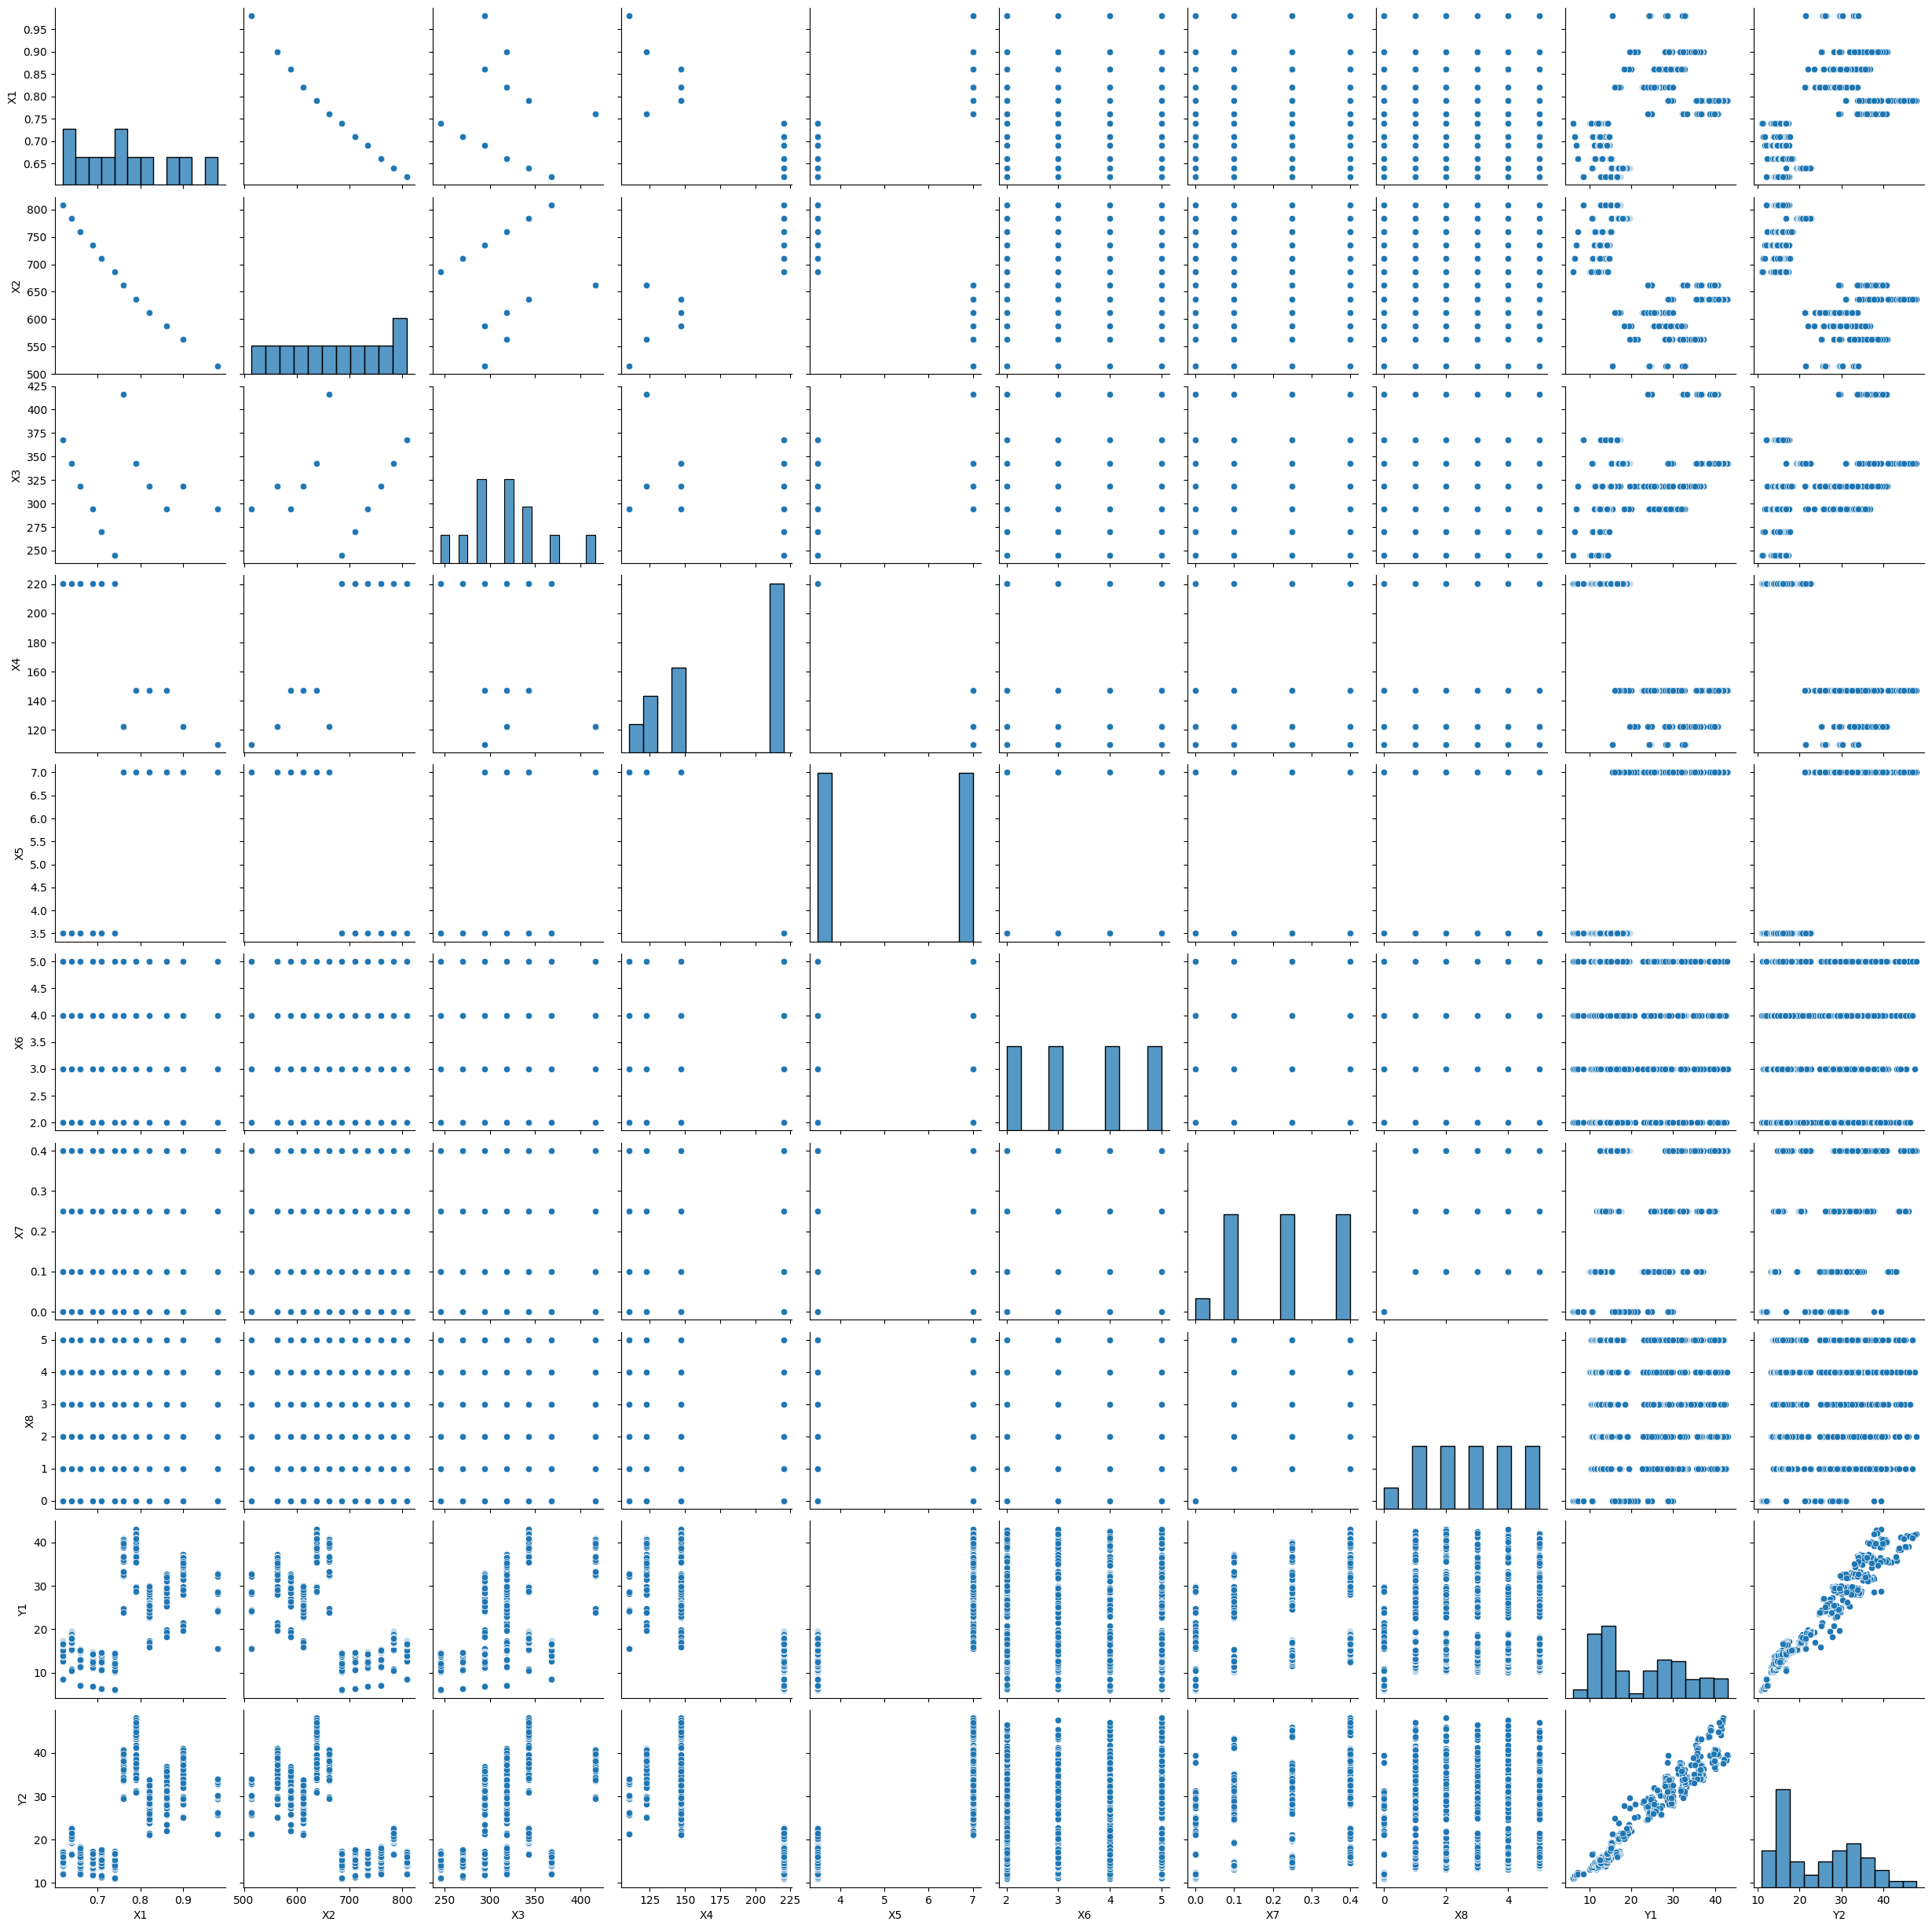

In [36]:
# TODO 4.2

# Create a pairplot with kernel density estimates on the diagonal
sns.pairplot(df_energy,  diag_kind='hist')
plt.show()


<div id="TODO5"></div>

### TODO5 (10 points)

**Wine Quality**
1. Add your own plots (at least one) for the wine quality dataset that you think will provide some sort of insight into the data set. 
    1. Hint: Refer to prior labs for ideas if needed!


2. State your observations concerning your wine quality plots and why selected each plot.

**Energy Efficiency**

3. Add your own plots (at least one) for the energy efficiency dataset that you think will provide some sort of insight into the data set. 
    1. Hint: Refer to prior labs for ideas if needed!


4. State your observations concerning your energy efficiency plots and why selected each plot.


Plot `TODO 5.1` below.

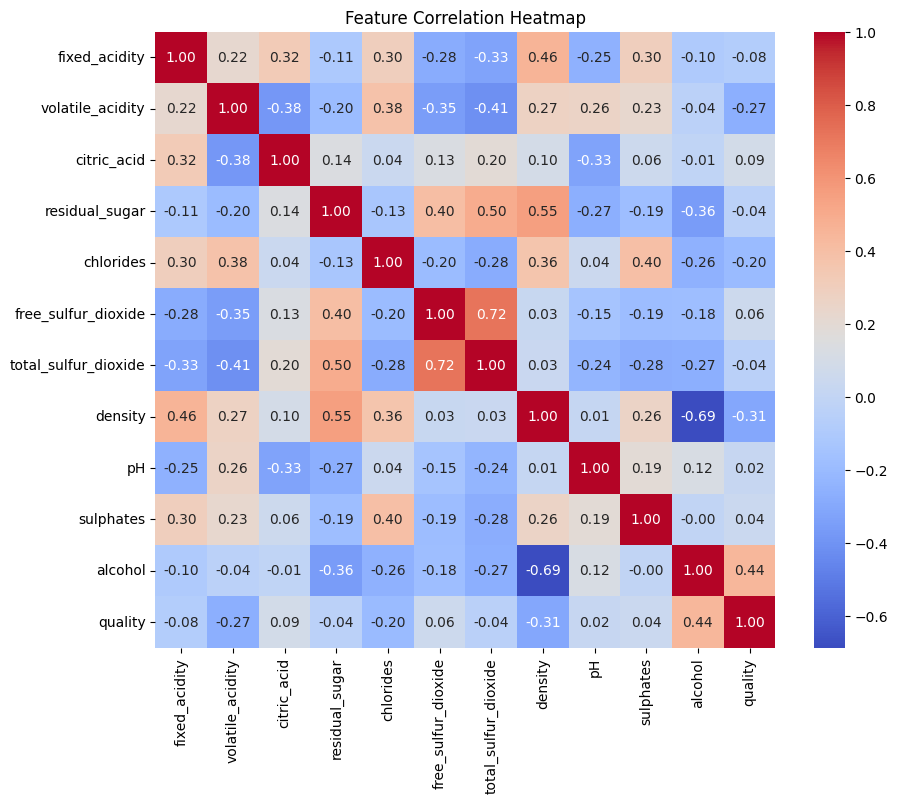

In [37]:
# TODO 5.1
# Plot: Correlation Heatmap
# A heatmap helps visualize correlation between features.

plt.figure(figsize=(10, 8))
sns.heatmap(df_wine.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


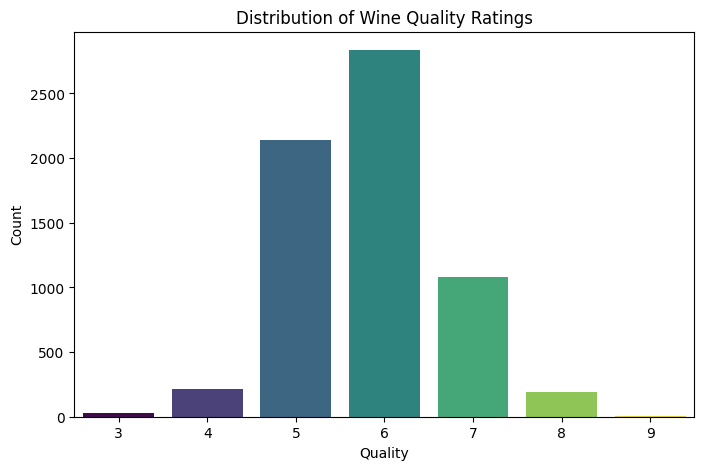

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(x="quality", data=df_wine, hue="quality", palette="viridis", legend=False)
plt.title("Distribution of Wine Quality Ratings")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

`TODO 5.2` State your observations concerning your wine quality plots and why selected each plot.


**DO NOT WRITE YOUR ANSWER IN THIS CELL!**

`ANSWER: from the heatmap, we can see that Alcohol strongly correlates with density, total_sulfur_dioxyde is correlated with free_sulfur_dioxyde.
from the histogram, we can see that the data is imbalanced because most of the quality is concentrated around 5, 6, and 7.
`

Plot `TODO 5.3` below.

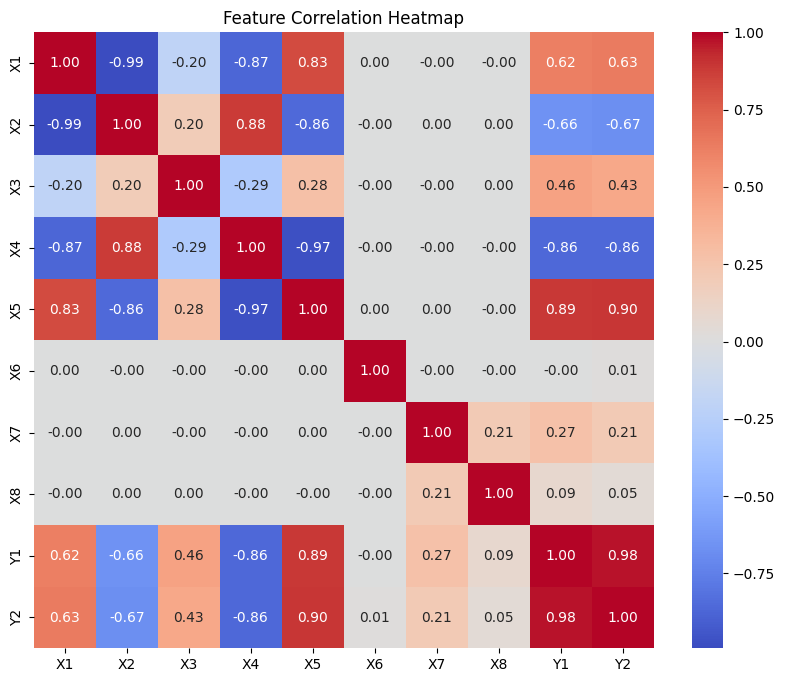

In [40]:
# TODO 5.3
plt.figure(figsize=(10, 8))
sns.heatmap(df_energy.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


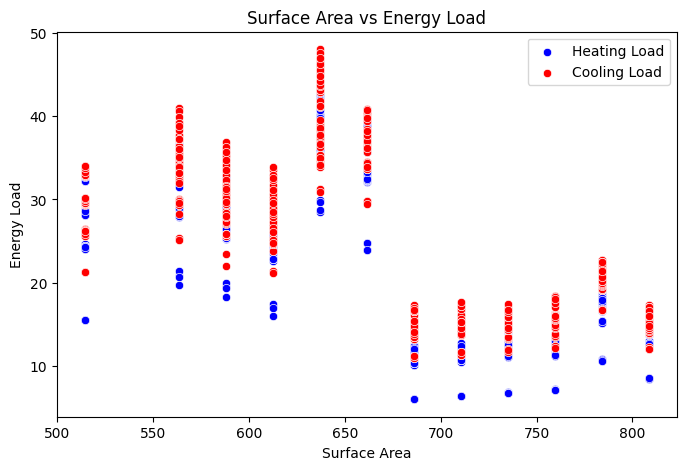

In [42]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="X2", y="Y1", data=df_energy, color="blue", label="Heating Load")
sns.scatterplot(x="X2", y="Y2", data=df_energy, color="red", label="Cooling Load")
plt.title("Surface Area vs Energy Load")
plt.xlabel("Surface Area")
plt.ylabel("Energy Load")
plt.legend()
plt.show()

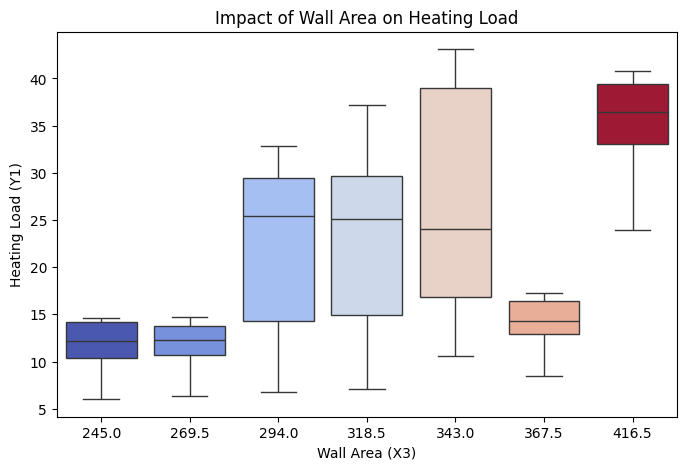

In [44]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="X3", y="Y1", data=df_energy, hue="X3", palette="coolwarm", legend=False)
plt.title("Impact of Wall Area on Heating Load")
plt.xlabel("Wall Area (X3)")
plt.ylabel("Heating Load (Y1)")
plt.show()

`TODO 5.4` State your observations concerning your energy efficiency plots and why selected each plot.


**DO NOT WRITE YOUR ANSWER IN THIS CELL!**

`ANSWER:`Heating Load (Y1) and Cooling Load (Y2) are highly correlated (0.98). Overall height(X5) is highly correlated with heating load(Y1) and cooling load (Y2).
The higher the Wall area (X3) the higher the heating load (Y1)

### Taking a closer look at our target feature

Let's take a closer look at the quality feature in the wine quality dataset by printing out the total number of data samples for each of our quality. 

Here we extract and visualize our unique quality values.

In [45]:
np.sort(df_wine['quality'].unique())

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

Now we print out 'quality' column and the number of samples each value has by using the Pandas DataFrame `value_count()` method. Notice how `value_count()` has already sorted our data in descending order according to the number of samples per each unique quality value. 

In [46]:
df_wine['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

Wow, above we can confirm that the data distribution is quite spread. In fact, our target feature data distribution is so spread some quality values only contain 5 data samples! This is good sign that if we use the quality feature as our target, then our model will be biased towards quality counts that have many samples. For instance, our algorithm will be more likely to predict ring counts of 6, 5, and 7 because it will have seen way more of their samples.

Typically, in this scenario we have to compensate for our imbalanced data by changing the data or adjusting our algorithm to account for the bias. If we wanted to account for data imbalance at the level of our data we could downsample or upsample our data. Likewise, if we want to account for bias at the level of the algorithm we could apply some form of algorithmic weighting to emphasis minority classes. We'll just quickly elaborate on downsampling and upsampling as it is the most straightforward.

Downsampling means we randomly sample, samples from each target. The amount in which we sample corresponds to the target with the least amount of samples. For instance, our target with the least amount of samples is the quality value of 9 here. This means we would downsample the rest of targets to only have 5 samples.

Upsampling applies the same idea but in the reverse direction. Once again we randomly sample, samples from each target. The amount in which we sample now corresponds to the target with the most samples. Here our target with the most samples is the quality value of 6. This means we upsample the rest of our targets to have 2836 samples. In practice, we duplicate the samples or augment existing samples of targets that have lower sample counts until they reach the desired sample count.

Both of these data compensation methods have their pros and cons. However, accounting for a imbalanced and bias data is out of scope for this lab. So, lets remove the samples with low quality frequency and keep the rest, i.e. we consider the samples with quality in the set 6, 5, and 7 for further processes.

In [48]:
df_wine = df_wine[df_wine['quality'].isin([6, 5, 7])]

df_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# Classification of Wine Quality Dataset

## Data Partitioning

Let us prepare train and test data first.

<div id="TODO6"></div>

### TODO6 (2 points)

1. Partition `df_wine` and store to `X_train`, `X_test`, `t_train`, and `t_test`.

  * Note the target label we classify is `quality` of wine. **Be sure not to include the label in the input!**

In [49]:
from sklearn.model_selection import train_test_split
X = df_wine.drop('quality', axis=1)
T = df_wine['quality']
X_train, X_test, t_train, t_test = train_test_split(X,T, test_size=0.2, random_state=0)  


print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(t_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(t_test.shape))

Train data shape: (4842, 11)
Train target shape: (4842,)
Test data shape: (1211, 11)
Test target shape: (1211,)


In [51]:
todo_check([
    ("X_train.shape == (4842, 11)", "X_train has the wrong shape"),
    ("X_test.shape == (1211, 11)", "X_test has the wrong shape"),
    ("t_train.shape == (4842,)", "t_train has the wrong shape"),
    ("t_test.shape == (1211,)", "t_test has the wrong shape")
])

Your code PASSED the code check!


<div id="TODO7"></div>

### TODO7 (3 points)

General notes:
- Refer to prior labs for help on completing this TODO if needed.
- Make sure to import classes or metrics if need.


1. Create a logistic regression model using Sklearn. Feel free to create a Sklearn `Pipeline` class so that you can standardize the data before passing it the logistic regression model. Store the output into `logreg`. Be sure to pass AT LEAST the arguments that correspond to the below descriptions for the logistic regression class.
    1. Use a seed of 0 for the `random_state`. **WARNING: If you don't use this seed, you might get different accuracies each time you rerun your algorithm. This can cause you to fail a TODO during grading.**
    
    2. Declare the number of maximum iterations as 1000.
    

2. Train the logistic regression model.


3. Evaluate the model's performance on the training data by computing the train score (i.e., accuracy). Store the output into `train_score`.


4.  Evaluate the model's performance on the testing data by computing the test score (i.e., accuracy). Store the output into `test_score`.


In [62]:
# Import the required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# TODO 7.1:
logreg_pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Standardize features
    ("logreg", LogisticRegression(random_state=0, max_iter=1000))  # Logistic Regression Model
])

# TODO 7.2:
logreg_pipeline.fit(X_train, t_train)
logreg = logreg_pipeline.named_steps["logreg"] # Store trained model to logreg

# TODO 7.3
train_score = logreg_pipeline.score(X_train, t_train)

# TODO 7.4:
test_score = logreg_pipeline.score(X_test, t_test)


print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))

Train Accuracy: 0.5844692275919041, Test Accuracy: 0.573905862923204


In [59]:
todo_check([
    ("train_score >= .5", "train_score needs to be great than 0.5"),
    ("test_score >= .5", "test_score needs to be great than 0.5"),
])

Your code PASSED the code check!


<div id="TODO8"></div>

### TODO8 (2 points)

Now, let us plot the results and see how much of test misses we have. 

1. Compute the predictions using the testing data. Store the output inside `y_test`


2. Sort the `t_test` with the NumPys `argsort()` function. Store the output into `sorted_idx`.


3. Plot the targets *with* the predictions such that both are indexed at `sorted_idx`. Additionally, the targets markers should be big red dots ('o') and the prediction markers should be blue dots ('.').


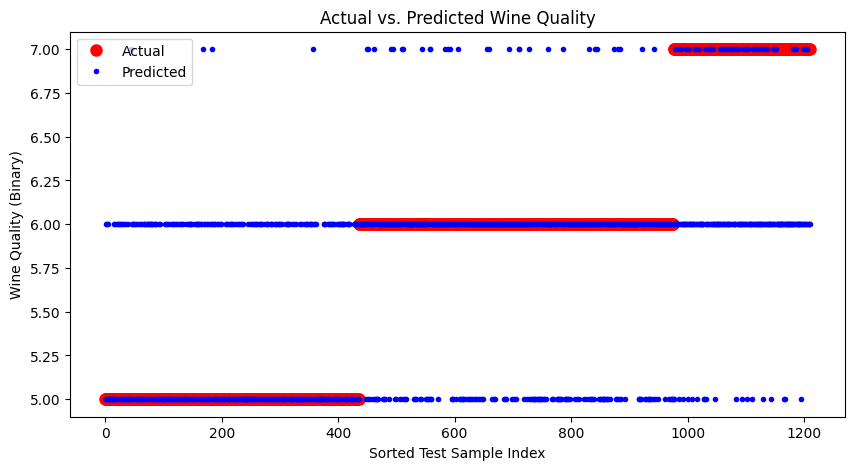

In [61]:

# TODO 8.1
y_test = logreg_pipeline.predict(X_test)

# TODO 8.2
sorted_idx = np.argsort(t_test)

# TODO 8.3
plt.figure(figsize=(10, 5))
plt.plot(range(len(t_test)), t_test.iloc[sorted_idx], "ro", markersize=8, label="Actual")
plt.plot(range(len(y_test)), y_test[sorted_idx], "b.", markersize=6, label="Predicted")
plt.xlabel("Sorted Test Sample Index")
plt.ylabel("Wine Quality (Binary)")
plt.title("Actual vs. Predicted Wine Quality")
plt.legend()
plt.show()


In [29]:
garbage_collect([
    'y_test', 'logreg', 'sorted_idx', 'train_score', 'test_score'
])

## Classification Evaluation

Let us benchmark the classifiers that we have learned using evaluation metrics.




<div id="TODO9"></div>

### TODO9 (10 points)

Now let's try logistic regression, kNN, and Naive Bayes for evaluation. 

General notes:
- Not all classifiers or metrics will be imported - import any you need.
- Refer to prior labs as we have done things similar to this TODO in the past.

**Before the loop**

1. Create instances of each classifier which corresponds to the names in the `names` list.  Utilize the below instructions to create the 3 classifiers:
    1. Create a class instance for logistic classification. Store the output into `logreg`. Don't forget, standardize the data for before passing it to logistic regression can improve performance.
    1. Create a class instance for K-nearest neighbors classification. Store the output into `knn`. Recall we have 3 classes, thus 3 clusters are needed.
    1. Create a class instance for Gaussian Naive Bayes classification. Store the output into `nb`.
    1. Hint: Notice all the names of these classifiers correspond to the variables within the `clfs` list and `names` list.

**In the loop**

2. Train the current classifier instance using the `X_train` and `t_train`.


3. Compute the predictions for the current classifier using the testing data. Store the output inside `y_test`
    
    
4. Evaluate the current classifier's performance on the training data/targets by computing the train score (i.e., accuracy). Store the output into `train_score`.


5.  Evaluate the current classifier's performance on the testing data/targets by computing the test score (i.e., accuracy). Store the output into `test_score`.


6. Compute the current classifier's `matthews_corrcoef` using the testing targets and predictions. Store the output into `mcc_score`.
  

7. Compute the current classifier's `classification_report` using the  testing targets and predictions. Store the output into `cm_report`
    1. Hint: Passing `target_names` will add the target labels to the report.


8. Create and plot a confusion matrix using Sklearn's `confusion_matrix()` function and `ConfusionMatrixDisplay` class using the testing targets and predictions.

**Discussion**

9. What do you think about the difference between the classifiers in the Wine Quality dataset? Which one works best?

Complete `TODO 9.1 - 9.8` below.

===============Logistic Regression================
Train Accuracy: 0.5844692275919041
Test Accuracy: 0.573905862923204
MCC: 0.3015826233057842
              precision    recall  f1-score   support

           5       0.63      0.61      0.62       436
           6       0.53      0.69      0.60       540
           7       0.61      0.23      0.33       235

    accuracy                           0.57      1211
   macro avg       0.59      0.51      0.52      1211
weighted avg       0.58      0.57      0.56      1211



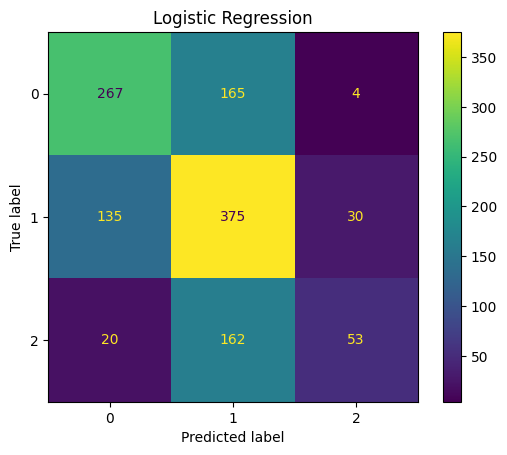

=======================kNN========================
Train Accuracy: 0.8056588186699711
Test Accuracy: 0.5986787778695293
MCC: 0.3617421027751485
              precision    recall  f1-score   support

           5       0.61      0.69      0.65       436
           6       0.59      0.58      0.59       540
           7       0.58      0.46      0.51       235

    accuracy                           0.60      1211
   macro avg       0.60      0.58      0.58      1211
weighted avg       0.60      0.60      0.60      1211



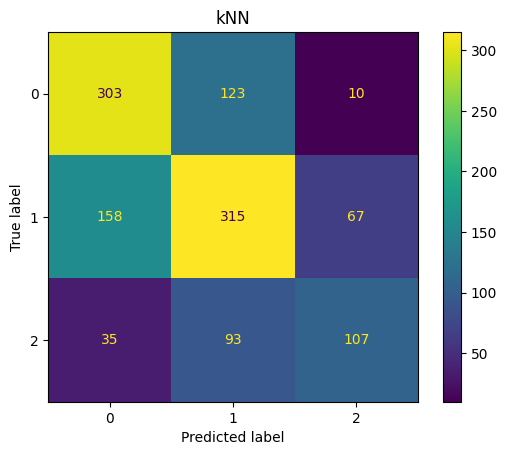

===================Naive Bayes====================
Train Accuracy: 0.4995869475423379
Test Accuracy: 0.5161023947151114
MCC: 0.2565956659752559
              precision    recall  f1-score   support

           5       0.56      0.57      0.57       436
           6       0.52      0.44      0.47       540
           7       0.45      0.59      0.51       235

    accuracy                           0.52      1211
   macro avg       0.51      0.53      0.52      1211
weighted avg       0.52      0.52      0.51      1211



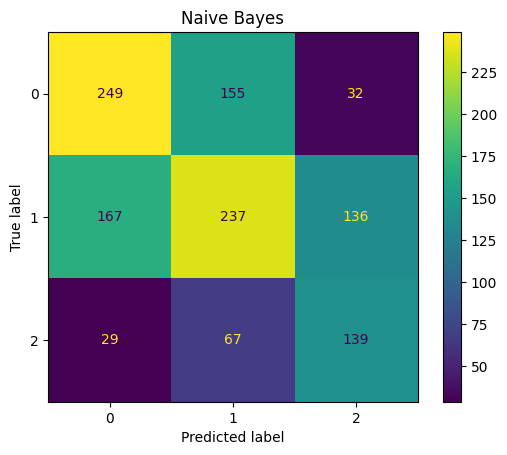

In [77]:
# Add required import statements
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, matthews_corrcoef

# Standardize features (important for Logistic Regression & KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#=====================================================================================

# TODO 9.1
logreg = LogisticRegression(random_state=0, max_iter=10000)
knn = KNeighborsClassifier(n_neighbors=3)  # k=3 since we have 3 classes
nb = GaussianNB()



# list of algorithms to test
clfs = [logreg, knn, nb]
# list of algorithm names 
names = ["Logistic Regression", "kNN", "Naive Bayes"]

# Loop through classifiers defined above
for name, clf in zip(names, clfs):
    print("{:=^50s}".format(name))

    # TODO 9.2 - 9.5
    if name == "Naïve Bayes":
        clf.fit(X_train, t_train)  # Naïve Bayes does not require scaling
        y_test = clf.predict(X_test)
    else:
        clf.fit(X_train_scaled, t_train)  # Use scaled data for LogReg & KNN
        y_test = clf.predict(X_test_scaled)
        

    train_score = clf.score(X_train_scaled, t_train) if name != "Naïve Bayes" else clf.score(X_train, t_train)
    test_score = clf.score(X_test_scaled, t_test)
    
    print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}")
  
    # TODO 9.6
    mcc_score = matthews_corrcoef(t_test, y_test)
    print(f"MCC: {mcc_score}")
    
    # TODO 9.7
    cm_report = classification_report(t_test, y_test, target_names=["5", "6", "7"])
    print(cm_report)
    
    # TODO 9.8
    cm = confusion_matrix(t_test, y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "1", "2"])
    disp.plot()
    plt.title(f"{name}")
    plt.show()

`TODO 9.9` What do you think about the difference between the classifiers in the Wine Quality dataset? Which one works best?

**DO NOT WRITE YOUR ANSWER IN THIS CELL!**

`ANSWER:`

# Predicting Energy Efficiency

## Data Partitioning


In [78]:
df_energy

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


This data contains multiple target columns. So when we split out data we'll use multiple columns for our target so we can assess the performance when using each target.

<div id="TODO10"></div>

### TODO10 (5 points)

1. The last two columns will be acting as our different targets. Thus, split these columns into a new DataFrame. Store the output into`df_energy_targets`.
    1. Hint: Feel free to use `target_i` which contains a list of the column indexes to be used as the targets.


2. Split the remaining columns, EXCLUDING columns in `df_energy_targets`, into a new DataFrame. Store the output into  `df_energy_features`. 
    1. Hint: We want all the columns EXCEPT the columns in `target_i`.


3. Partition the energy efficiency dataset and store the output into `X_train`, `X_test`, `t_train`, and `t_test`.

In [79]:
D = df_energy.shape[1]
target_i = [8,9]   # target index
# TODO 10.1 - 10.2
df_energy_targets = df_energy.iloc[:, target_i]
df_energy_features = df_energy.drop(columns=df_energy_targets.columns)

display(df_energy_features)
display(df_energy_targets)

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
...,...,...
763,17.88,21.40
764,16.54,16.88
765,16.44,17.11
766,16.48,16.61


In [80]:
# TODO 10.3
X_train, X_test, t_train, t_test = train_test_split(df_energy_features, df_energy_targets, test_size=0.2, random_state=0)


print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(t_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(t_test.shape))

Train data shape: (614, 8)
Train target shape: (614, 2)
Test data shape: (154, 8)
Test target shape: (154, 2)


In [81]:
todo_check([
    ("X_train.shape == (614, 8)", "X_train has the wrong shape"),
    ("X_test.shape == (154, 8)", "X_test has the wrong shape"),
    ("t_train.shape == (614, 2)", "t_train has the wrong shape"),
    ("t_test.shape == (154, 2)", "t_test has the wrong shape"),
])

Your code PASSED the code check!



# Regression Evaluation

How well can the regression models work on the energy efficiency data? Let us test it by applying different regularization penalty. 

<div id="TODO11"></div>


### TODO11 (10 points)

General notes:
- Not all regression classes or metrics will be imported - import any classes as needed.
- Refer to prior labs as we have done things similar to this TODO in the past.

**Before the loop**

1. Create a list of REFERENCES (i.e., DO NOT initialize the class) to our 4 regression models: linear regression (least squares), ridge regression, lasso regression, and elastic regression. Store the list output into `models`.
    1.  Hint: Notice all the names of these models correspond to the strings within the `names` list.


2. Pick your own regularization hyper-parameter values for the ridge regression class. Add the values to the `ridge_params` dictionary where the argument is the key and the value is the value you wish to pass (e.g., `'alpha': 1000`)
    1. Hint: It is OK to put any arbitrary number for now. We'll try to optimize the values later.
    
    
3. Pick your own regularization hyper-parameter values for the lasso regression class. Add the values to the `lasso_params` dictionary where the argument is the key and the value is the value you wish to pass (e.g., `'alpha': 10`)
    1. Hint: It is OK to put any arbitrary number for now. We'll try to optimize the values later.
    
    
4. Pick your own regularization hyper-parameter values for the elastic regression class. Add the values to the `elastic_params` dictionary where the argument is the key and the value is the value you wish to pass (e.g., `'alpha': 0.1` and `'l1_ratio': 0.7`)
    1. Hint: It is OK to put any arbitrary number for now. We'll try to optimize the values later.

**Inside the loop**

5. Train the current model instance using `X_train` and the current target column (denoted by `col`) from `t_train`.


6. Compute the predictions for the current model using the testing data. Store the output inside `y_test`


7. Compute the various evaluation metrics using the testing predictions and the current target (given by indexing `t_test` by `col`). Do so by filling in the `results` list where each element is a Sklearn function call that corresponds to the metric name given in `eval_metric_names`. 
    1. Hint: For example 'R2' is the first element in `eval_metric_names`. Thus, the first element in `results` should be a function call to the `r2_score()` function. Make sure to pass the proper arguments to each function.

**Discussion**

8. Do you observe any differences in the performance of the models when using different targets? What do you think about the results? 

In [83]:
# Add necessary import statements
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, max_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# TODO 11.1
models = [LinearRegression, Ridge, Lasso, ElasticNet]

# Does not have any hyper-parameters (at least closed form doesn't)
linear_reg_params = {}

# TODO 11.2
ridge_params = {
'alpha': 1000
}

# TODO 11.3
lasso_params = {
 'alpha': 10   
}

# TODO 11.4
elastic_params = {
   'alpha': 0.1, 'l1_ratio': 0.7 
}

names = [ 'LinearReg', 'Ridge', 'Lasso', 'Elastic']
model_params = [linear_reg_params, ridge_params, lasso_params, elastic_params]

eval_metric_names = [
    "R2",
    'max_err',
    "MAE",
    "MAPE",
    "MSE"
]

# iterate through each target
for col in df_energy_targets.columns:
    
    print("Predicting ", col)
    df_results = []
    for name, model, params in zip(names, models, model_params):
        model = Pipeline([('scaler', StandardScaler()),
                           ('regr', model(**params))])  
        # TODO 11.5 - 11.6
        # Train model
        model.fit(X_train, t_train[col])
        # Predict on test set
        y_test = model.predict(X_test)
        ##### evaluate
         # Compute evaluation metrics
        r2 = r2_score(t_test[col], y_test)
        max_err_val = max_error(t_test[col], y_test)
        mae = mean_absolute_error(t_test[col], y_test)
        mape = mean_absolute_percentage_error(t_test[col], y_test)
        mse = mean_squared_error(t_test[col], y_test)  
        
        # TODO 11.7
        results = [
            r2, 
            max_err_val,
            mae,
            mape,
            mse  
        ]
        df_results.append(results)
    
    # Create metric dataframe for displaying results
    df_results = pd.DataFrame(
        df_results,
        index=names,
        columns=eval_metric_names)
    display(df_results)
    

Predicting  Y1


,R2,max_err,MAE,MAPE,MSE
LinearReg,0.908555,8.878831,2.222083,0.101616,10.097917
Ridge,0.706541,15.116062,4.504623,0.233816,32.405591
Lasso,-0.003672,20.920489,9.572403,0.527704,110.831769
Elastic,0.887962,9.711549,2.438498,0.112957,12.371890


Predicting  Y2


,R2,max_err,MAE,MAPE,MSE
LinearReg,0.886227,11.173715,2.248256,0.089516,10.700983
Ridge,0.703827,16.929469,4.216335,0.187535,27.856748
Lasso,-0.001282,21.921857,8.838076,0.411861,94.176122
Elastic,0.865984,12.659326,2.495257,0.101127,12.604921


`TODO 11.8` Do you observe any differences in the performance of the models when using different targets? What do you think about the results? 

**DO NOT WRITE YOUR ANSWER IN THIS CELL!**

`ANSWER: I can see that for R2 lasso scores is negative while the others are greater than 70%the max error are all in the 2-digit values; again lasso is higher (21.9), again for the MAE Lasso stays higher for MAPE, and MSE. 
for different targets no particular trend toward a specific target.`

# Cross Validation


So far we have only ever had one test set and one training set. However, sometimes we might want to know how our models perform before testing them on our held out partition (the test set). To do this we often use a validation set. However, a single static validation set might not give us strong confidence in the performance of our model.

In order to gain more confidence in the performance of our models we can take the training data and assess the classifier on different validation splits cut from the training data. To do this, we use an algorithm called cross-validation.


<div id="TODO12"></div>


### TODO12 (10 points)

To start off, let's begin from data splitting to make our lives easier and then move onto cross-validation.

1. Partition the `df_wine` dataset where the 'quality' column will be our target. Store the output into `X_train`, `X_test`, `t_train`, and `t_test`.
    1. Hint: Repeat what you did in `TODO 6`.


2. Create a logistic regression model using Sklearn. Feel free to create a Sklearn `Pipeline` class so that you can standardize the data before passing it the logistic regression model. Store the output into `logreg`. Be sure to pass AT LEAST the arguments that correspond to the below descriptions for the logistic regression class.
    1. Use a seed of 0 for the `random_state`. **WARNING: If you don't use this seed, you might get different accuracies each time you rerun your algorithm. This can cause you to fail a TODO.**


3. Cross-validate the model by using the `cross_val_score()` function with 10 folds. Use the training data/targets. Store the output into `scores`.


4. What do you think about the average CV error and standard deviation? How does it relate to the scores you saw in `TODO 7/8/9`?

In [84]:
# Add necessary import statements
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# TODO 12.1
X = df_wine.drop('quality', axis=1)
T = df_wine['quality']
X_train, X_test, t_train, t_test = train_test_split(X,T, test_size=0.2, random_state=0) 

# TODO 12.2
logreg = Pipeline([
    ('scaler', StandardScaler()),  # Standardize data
    ('logreg', LogisticRegression(random_state=0, max_iter=1000))  # Logistic Regression
])

# TODO 12.3
#Perform 10-fold cross-validation
scores = cross_val_score(logreg, X_train, t_train, cv=10)
#mean_score = np.mean(scores)
#std_dev = np.std(scores)

print(u"CV Error: {:.3f} \u00B1 {:.3f}".format(scores.mean(), scores.std()))

CV Error: 0.583 ± 0.018


In [85]:
todo_check([
    ("X_train.shape == (4842, 11)", "X_train has the wrong shape"),
    ("X_test.shape == (1211, 11)", "X_test has the wrong shape"),
    ("t_train.shape == (4842,)", "t_train has the wrong shape"),
    ("t_test.shape == (1211,)", "t_test has the wrong shape"),
    ("scores.mean() >= .54", "scores should be greater than .54")
])

Your code PASSED the code check!


`TODO 12.4` What do you think about the average CV error and standard deviation? How does it relate to the scores you saw in `TODO 7/8/9`?

**DO NOT WRITE YOUR ANSWER IN THIS CELL!**

`ANSWER:` We see that the mean is moderate, not too low but not high, the standard deviation being low denotes stability.

In [38]:
garbage_collect([
    'X_train', 't_train', 'X_test', 't_test', 'y_test', 'scores'
])

Let us repeat the same for the Energy Efficiency regression. 

<div id="TODO13"></div>


### TODO13 (6 points)

Complete the TODOs within the loop that loops over our five targets. 

1. Partition the `df_energy_features` and `df_energy_targets` DataFrames. To do so, index `df_energy_targets` at the current target column (given by `col` which will change each iteration of the for-loop). Store the output into `X_train`, `X_test`, `t_train`, and `t_test`.

    
2. Select one of the 4 regression algorithms and create an instance of it. 


3. Cross-validate the model by using the `cross_val_score()` function with 10 folds. Use the training data/targets. Store the output into `scores`.


4. What do you think about the CV error? Do you observe any difference from the previous metrics seen in `TODO 11`?

In [93]:
# for each target
for col in df_energy_targets.columns:

    print(col, end="  \t")
    # TODO 13.1
    X_train, X_test, t_train, t_test = train_test_split(
        df_energy_features, df_energy_targets[col], test_size=0.2, random_state=0
    )

    # TODO 13.2
    model = Ridge(alpha=100)

    # TODO 13.3
    scores = cross_val_score(model, X_train, t_train, cv=10, scoring="r2")

    print(u"CV Error: {:.3f} \u00B1 {:.3f}".format(scores.mean(), scores.std()))

Y1  	CV Error: 0.836 ± 0.029
Y2  	CV Error: 0.822 ± 0.017


`TODO 13.4` What do you think about the CV error? Do you observe any difference from the previous metrics seen in `TODO 11`?

**DO NOT WRITE YOUR ANSWER IN THIS CELL!**

`ANSWER: I can see the CV error is high above 80% A cross_val_score of 0.80 (or 80%) means that, on average, the model correctly explains 80% of the variance in the data during cross-validation, the score is almost similar to R2 in TODO11. A standard deviation (std) of 0.029 in cross-validation scores means that the model's performance is fairly stable across different folds` 

In [40]:
garbage_collect([
    'X_train', 't_train', 'X_test', 't_test', 'y_test', 'scores', 'col'
])

# Hyper-Parameter Search

Models that we have learned so far have many different hyper-parameters that we had to initialize with. 
The choice of hyper-parameters is critical to the performance of the model. 
For instance, the pruning options in decision trees or the number of trees in random forest are the examples of hyper-parameters. 
Then, how can we find a good hyper-parameters? There are many different ways to optimize them. Let us practice some of them here. 


<div id="TODO14"></div>


### TODO14 (5 points) 


Let us play with Stochastic Gradient Descent (SGD) since it has a few hyper-parameters that can be tuned. First, SGD has regularization parameter `alpha`, that multiplies the regularization term. The higher the value, the stronger the regularization. Second, SGD allows you to select a different loss such as `squared_error`, `huber`, `epsilon_insensitive`, `squared_epsilon_insensitive`. 

The following guidance instructs you with `GridSearchCV` but there are many other options such as `RandomizeSearchCV`.


1. Import `GridSearchCV`. 


2. Create `GridSearchCV()` instance by passing the SGD regressor and hyper-parameters dictionary. Store the output into `gscv`.
    1. Hint: Notice we define the hyper-parameters we want to test as a dictionary where the values are the lists of values to use for a given hyper-parameter.


3. Run the `gscv` instance by calling the `fit()` method and passing ALL the data `df_energy_features` and the targets `df_energy_targets`.
    1. Hint: Since df_energy_target has two values, combine them into a column named `combined_target` by taking the average of them and pass it to the `fit()` method. Passing the complete dataframe `df_energy_targets` directly will result in an error.


4. Access the best hyper-parameter combination that is stored inside the `gscv` instance after fitting. Store the output into `best_params`.


In [95]:
np.random.seed(seed)
random.seed(seed)

# Import and Create instance of SGDRegressor
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(random_state=0)

# TODO 14.1
from sklearn.model_selection import GridSearchCV

# Hyper-parameters to be search over
hyper_parameters = {
    'alpha':[0.0001, 0.001, 0.01, 0.1, 1],
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
}

# TODO 14.2 - 14.5
gscv = GridSearchCV(sgd, hyper_parameters, cv=5, scoring='r2', n_jobs=-1)
# Combine targets (Y1, Y2) into a single target column
df_energy['combined_target'] = df_energy[['Y1', 'Y2']].mean(axis=1)

df_energy_combine_target = df_energy['combined_target']
gscv.fit(df_energy_features, df_energy_combine_target)

best_params = gscv.best_params_

print(f"Best params: {best_params}")

Best params: {'alpha': 0.01, 'loss': 'huber'}


In [96]:
todo_check([
    ("np.all(list(best_params.values()) == [0.01, 'huber'])", "best_params are potentially not correct."),
])

Your code PASSED the code check!



<div id="TODO15"></div>


### TODO15 (10 points)

Now, let us plot the results and observe what hyper-parameters work best for SGD. `cv_results_` attribute is the dictionary that contains the grid search cross validation results. Here follows the how you access the values such as tested parameters `params`, mean and standard deviation of test scores for each hyper-parameter combination (grid). 

 **Read and run the following cells given before the TODOs in order to fully understand how you access different pieces of data that will be used when plotting.**
 
1. Using the `plt.plot()` function for Matplotlib, create a plot that plots the mean test scores from `gscv`. The plot should draw a blue line between the various big'o markers (use option 'bo-').


2. Use `fill_between()` function for Matplotlib to plot the one standard deviation above and below the mean test errors.
    1. Hint: You can add the test score STDs to the test score means to get one STD above the means. You can subtract test score STDs from the test score means to get one below the means. 
    1. Hint: You'll have to access the STDs and means stored inside `gscv`. 
    1. Hint: Adjust the alpha value to make the fill transparent.


3. What do you observe from the figure? Do you see any patterns with the performance of certain hyper-parameters?


In [97]:
gscv.cv_results_['params']

[{'alpha': 0.0001, 'loss': 'squared_error'},
 {'alpha': 0.0001, 'loss': 'huber'},
 {'alpha': 0.0001, 'loss': 'epsilon_insensitive'},
 {'alpha': 0.0001, 'loss': 'squared_epsilon_insensitive'},
 {'alpha': 0.001, 'loss': 'squared_error'},
 {'alpha': 0.001, 'loss': 'huber'},
 {'alpha': 0.001, 'loss': 'epsilon_insensitive'},
 {'alpha': 0.001, 'loss': 'squared_epsilon_insensitive'},
 {'alpha': 0.01, 'loss': 'squared_error'},
 {'alpha': 0.01, 'loss': 'huber'},
 {'alpha': 0.01, 'loss': 'epsilon_insensitive'},
 {'alpha': 0.01, 'loss': 'squared_epsilon_insensitive'},
 {'alpha': 0.1, 'loss': 'squared_error'},
 {'alpha': 0.1, 'loss': 'huber'},
 {'alpha': 0.1, 'loss': 'epsilon_insensitive'},
 {'alpha': 0.1, 'loss': 'squared_epsilon_insensitive'},
 {'alpha': 1, 'loss': 'squared_error'},
 {'alpha': 1, 'loss': 'huber'},
 {'alpha': 1, 'loss': 'epsilon_insensitive'},
 {'alpha': 1, 'loss': 'squared_epsilon_insensitive'}]

In [99]:
param_names = ["{}_{}".format(p['alpha'], p['loss']) for p in gscv.cv_results_['params']]
param_names

['0.0001_squared_error',
 '0.0001_huber',
 '0.0001_epsilon_insensitive',
 '0.0001_squared_epsilon_insensitive',
 '0.001_squared_error',
 '0.001_huber',
 '0.001_epsilon_insensitive',
 '0.001_squared_epsilon_insensitive',
 '0.01_squared_error',
 '0.01_huber',
 '0.01_epsilon_insensitive',
 '0.01_squared_epsilon_insensitive',
 '0.1_squared_error',
 '0.1_huber',
 '0.1_epsilon_insensitive',
 '0.1_squared_epsilon_insensitive',
 '1_squared_error',
 '1_huber',
 '1_epsilon_insensitive',
 '1_squared_epsilon_insensitive']

In [100]:
gscv.cv_results_['mean_test_score']

array([-3.26701182e+26, -5.33282538e+00, -8.52863542e+01, -1.51567169e+26,
       -5.10588543e+26, -2.92192445e+00, -3.28049314e+02, -4.73457438e+26,
       -3.07564373e+26, -2.51253194e+00, -4.43495211e+02, -3.80304299e+26,
       -3.38194167e+26, -7.05881984e+00, -4.39098690e+02, -6.91659295e+26,
       -7.81114027e+26, -6.23600062e+00, -2.30133168e+02, -3.98977790e+26])

In [101]:
gscv.cv_results_['std_test_score']

array([2.57111784e+26, 3.69123480e+00, 8.24100632e+01, 6.42251266e+25,
       4.13020075e+26, 3.00608832e+00, 9.96174964e+01, 4.38258103e+26,
       4.47915259e+26, 3.87461228e+00, 3.69467872e+02, 4.86621288e+26,
       3.00731580e+26, 7.49008391e+00, 4.27566490e+02, 6.69493615e+26,
       5.15192990e+26, 1.09341172e+01, 3.66415898e+02, 3.57966257e+26])

Plot `TODO 15.1 - 15.2` below

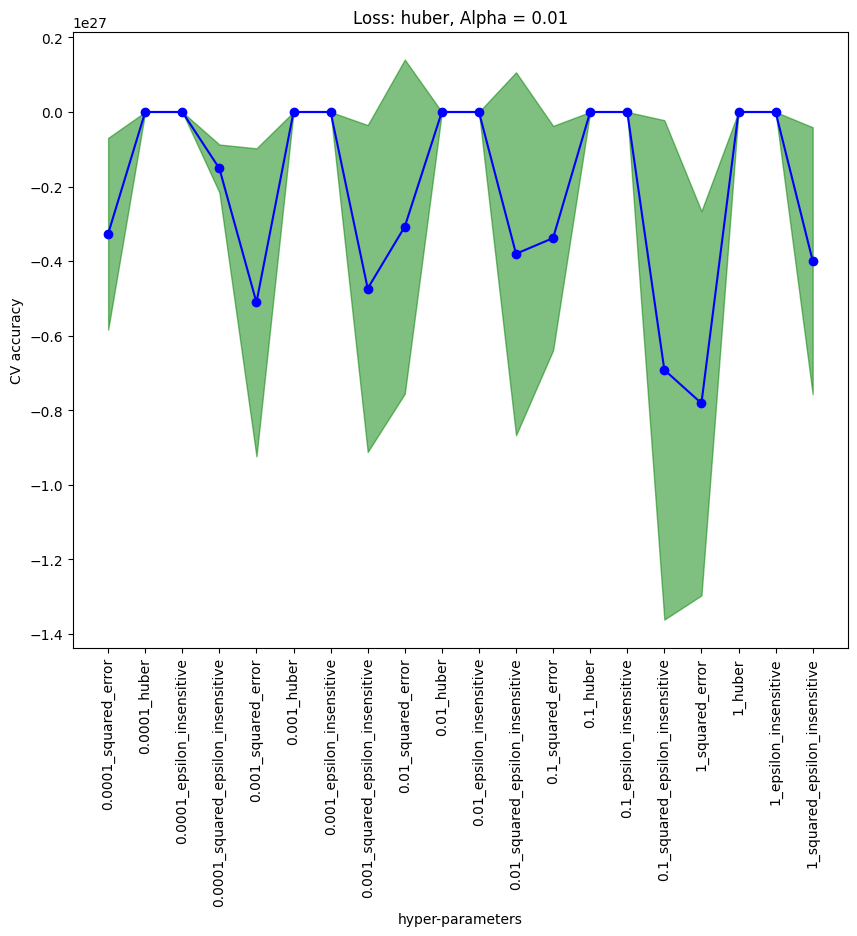

In [105]:
plt.figure(figsize=(10,8))
rng = range(len(param_names)) # Index range for plotting

# TODO 15.1 - 15.2
#Extract mean and std test scores from GridSearchCV results
mean_scores = gscv.cv_results_['mean_test_score']
std_scores = gscv.cv_results_['std_test_score']
plt.plot(rng, mean_scores, 'bo-', label="Mean Test Score")

#Fill the region one std above and below the mean
plt.fill_between(rng, 
                 mean_scores - std_scores, 
                 mean_scores + std_scores, 
                 color='green', alpha=0.5, label="±1 Standard Deviation")
# xtick, x and y label and title
plt.xticks(rng, param_names, rotation=90)
plt.xlabel("hyper-parameters")
plt.ylabel("CV accuracy")
plt.title("Loss: {}, Alpha = {}".format(
    gscv.best_params_['loss'], gscv.best_params_['alpha']
));

`TODO 15.3` What do you observe from the figure? Do you see any patterns with the performance of certain hyper-parameters?

**DO NOT WRITE YOUR ANSWER IN THIS CELL!**

`ANSWER: I can see that the mean test score flattens on huber confirming best Params:'alpha': 0.01, 'loss': 'huber that some hyperparameters improve model performance. Around the same areas (flattened) the shaded area is shallow even non-existing it means the model’s performance is consistent.'`

In [106]:
garbage_collect([
    'X_train', 't_train', 'X_test', 't_test', 'y_test', 'gscv', 'best_params'
    'best_param_score'
])

# Feature Selection

We have been using all the features to make a prediction. Well, is there any feature not necessary? 
Or is there any one actually disturbing the classification? 
It is reasonable to play with feature selection to selectively find a good set of features. 
Use Wine Quality data for the following TODOs. 

<div id="TODO16"></div>


### TODO16 (5 points)

Let us try a naive feature selection method first.

1. Repartition the `df_wine` and store the output into `X_train`, `X_test`, `t_train`, and `t_test`.
    1. Hint: Repeat what you did in `TODO 6`.


2. Initialize an instance of the `VarianceThreshold` class, select features whose variance is higher than 0.1. Store the output into `vt`.


3. Use the `fit_transform()` method to train and transform the data `X_train`. Store the output into `vt_X_train`.


4. How many features are selected? What are they? 
    1. Hint: Try calling the `get_feature_names_out()` or `get_support()` methods on `vt` to figure out the names of the selected features. 
 

In [107]:
df_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [111]:
np.random.seed(seed)
random.seed(seed)

# TODO 16.1 - 16.3
X = df_wine.drop('quality', axis=1)
t = df_wine['quality']
X_train, X_test, t_train, t_test = train_test_split(X,t, test_size=0.2, random_state=0)

# Initialize VarianceThreshold with threshold 0.1
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.1)

#Use the fit_transform() method to train and transform the data X_train. Store the output into vt_X_train.
vt_X_train = vt.fit_transform(X_train)

# Get feature mask (True = Selected, False = Removed)
selected_mask = vt.get_support()

# Get names of selected features
selected_features = X_train.columns[selected_mask]
print(selected_features)

pd.DataFrame(vt_X_train)

Index(['fixed_acidity', 'residual_sugar', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'alcohol'],
      dtype='object')


,0,1,2,3,4
0,6.2,4.4,11.0,32.0,11.6
1,6.6,10.9,29.0,130.0,10.5
2,7.6,1.3,34.0,176.0,9.5
3,7.3,6.8,29.0,122.0,12.6
4,6.3,3.7,34.0,132.0,10.7
...,...,...,...,...,...
4837,7.7,2.0,29.0,134.0,9.8
4838,7.9,8.5,20.0,112.0,11.7
4839,8.5,4.3,24.0,99.0,9.7
4840,6.2,8.3,36.0,216.0,9.6


In [109]:
todo_check([
    ("X_train.shape == (4842, 11)", "X_train has the wrong shape"),
    ("X_test.shape == (1211, 11)", "X_test has the wrong shape"),
    ("t_train.shape == (4842,)", "t_train has the wrong shape"),
    ("t_test.shape == (1211,)", "t_test has the wrong shape"),
    ("vt_X_train.shape == (4842, 5)", "vt_X_train has the wrong shape"),
    ("vt.get_params()['threshold'] == .1", "Threshold was not set to 0.1."),
    ("np.all(np.isclose(vt_X_train[-50], np.array([  7.7,  12.1,  60. , 177. ,   8.9])))", "vt_X_train has potentially incorrect values.")
])

Your code PASSED the code check!


`TODO 16.4` Which features were selected? How many were selected? 

**DO NOT WRITE YOUR ANSWER IN THIS CELL!**


`ANSWER: the selected features are: ['fixed_acidity', 'residual_sugar', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'alcohol']`


<div id="TODO17"></div>


### TODO17 (5 points)

Let's now do some feature selection where the learning algorithm is involved in the process of selecting the best features for said algorithm. 

1. Create an instance using the proper Sklearn class for conducting random forest classification (make sure to import and use the right class if needed). Store the output into `rf`. Pass the arguments that correspond to the following descriptions:
    1. Use 30 estimators.
    2. Use a seed of 0 for the `random_state` argument. **WARNING: If you don't use this seed, you are likely to fail future TODOs even if your code is correct!**
    
    
2. Create an instance of Sklearn's `SequentialFeatureSelector` class. Initialize it using `rf` and set it to select 2 features. Store the output into `sfs`.


3. Use the `fit_transform()` method to train and transform the training data. That being said, you'll need to pass BOTH the training data `X_train` and targets `t_train`. Store the output into `sfs_X_train`.


4. What features are selected? Are the features similar to what was found in `TODO 16`?  

In [112]:
np.random.seed(seed)
random.seed(seed)

# TODO 17.1 - 17.3
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

#Create an instance using the proper Sklearn class for conducting random forest classification
rf = RandomForestClassifier(n_estimators=30, random_state=0)

#Create an instance of Sklearn's SequentialFeatureSelector class. Initialize it using rf 
#and set it to select 2 features. Store the output into sfs.

sfs = SequentialFeatureSelector(rf, n_features_to_select=2)

#Use the fit_transform() method to train and transform the training data. That being said, 
#you'll need to pass BOTH the training data X_train and targets t_train. Store the output into sfs_X_train.
sfs_X_train = sfs.fit_transform(X_train, t_train)

selected_features = X_train.columns[sfs.get_support()]
print("Selected Features:", selected_features)


pd.DataFrame(sfs_X_train)

Selected Features: Index(['total_sulfur_dioxide', 'alcohol'], dtype='object')


,0,1
0,32.0,11.6
1,130.0,10.5
2,176.0,9.5
3,122.0,12.6
4,132.0,10.7
...,...,...
4837,134.0,9.8
4838,112.0,11.7
4839,99.0,9.7
4840,216.0,9.6


In [113]:
todo_check([
    ("X_train.shape == (4842, 11)", "X_train has the wrong shape"),
    ("X_test.shape == (1211, 11)", "X_test has the wrong shape"),
    ("t_train.shape == (4842,)", "t_train has the wrong shape"),
    ("t_test.shape == (1211,)", "t_test has the wrong shape"),
    ("sfs_X_train.shape == (4842, 2)", "sfs_X_train has the wrong shape"),
    ("sfs.get_params()['n_features_to_select'] == 2", "Number of features to select is incorrect."),
    ("rf.get_params()['n_estimators'] == 30", "Number of estimators is incorrect."),
    ("np.all(np.isclose(sfs_X_train[-50], np.array([177. ,   8.9])))", "sfs_X_train has potentially incorrect values.")
])

Your code PASSED the code check!


`TODO 17.4`  What features are selected? Are the features similar to what was found in `TODO 16`?  

`ANSWER: selected features are ['total_sulfur_dioxide', 'alcohol'], these 2 features are among those selected in TODO 16`

<div id="feedback"></div>

## Feedback (2 point)

Did you enjoy the lab? 

Please take time to answer the following feedback qustions to help us further improve these labs! Your feedback is crucial to making these labs more useful!
    


* How do you rate the overall experience in this lab? (5 likert scale. i.e., 1 - poor ... 5 - amazing)  
Why do you think so? What was most/least useful?



`ANSWER: I rate this amazing. I like the step-by-step approach, I can now make a clear difference between models for regression and classification models. I like the comparison of scores, and the selection of relevant features.`

* What did you find difficult about the lab? Were there any TODOs that were unclear? If so, what specfically did not make sense about it?



`ANSWER the lab is very exciting, overall clear, I will suggest that we get a little more help on what we are observing for and why. `

* Which concepts, if any, within the lab do you feel could use more explanation?

`ANSWER the observations were a challenge for me, I do not know what to look for and why it is relevant. `